### NOUNWEB


Lexographical analysis of words has many applications in the field of natural language processing. It includes verious use cases in areas like word recommendation,  synsets, word priming, etc. In this project, the author aims at creating a network of nouns based on lexographical methodology. Data of nouns is extracted from the oxford english dictionary. This data is organized into a network of nouns. Then, various community detection algorithms are run on  the network to generate 'synsets'. A synset is set of one or more synonyms that are interchangeable in some context without changing the truth value of the proposition in which they are embedded.


A* algorithm is used for finding path between two nouns. This might be useful for applications like 'find the odd man out'. Applications of this dataset may extend to keyboard autocomplete, word priming and natural language processing.

### Dictionary Data extraction

Let us first parse the 'oxford english dictionary'. We shall extract all nouns from the file and place them in a csv files. This extraction is based on the noun defination in the dictionary.


After that, we shall extract the nouns from the information in the dictionary and place them adjucent to the corresponding noun. The second extraction is based on the list of most popular nouns. Possible applications include keyboard writing suggestions, natural language processing and word priming.


Example

<b>Apple</b>  n. 1 roundish <b>firm</b> <b>fruit</b> with <b>crisp</b> <b>flesh</b>. 2 <b>tree</b> bearing this.  <b>apple</b> of one's eye cherished <b>person</b> or <b>thing</b>. [old english]


Output file

apple apple firm fruit crisp flesh tree apple person thing 


In [28]:
Oxford = open('Oxford English Dictionary.txt', 'r') # Reading mode
csv = open('nounlist.csv','r') # list of commonly uses nouns.
save = open("myfile.txt", "w") # file to store nounweb

nodes_list = [] 
#Empty list to store nodes of nounweb

#make list of commonly used nouns
nlist=[] #empty list used to store the nouns whih appear in oxford dictionary.
for noun in csv:
    noun = noun[:-1].lower()  # remove \n
    # print(noun)
    nlist.append(noun)
#print(nlist)

import re # import regex
#Creating a nounweb.
for line in Oxford:
    # Skipping the empty lines.
    if(line=='\n'):
        continue

    # Removing the brackets and numbers from the text using REGEX.
    line=re.sub("([\(\[]).*?([\)\]])", "", line) # remove [] brackets
    line=re.sub("[0-9]","",line) # remove number instances
    line=line.split(" ") # remove
    if (line == '\n'):
        continue


    '''
    NOTE-
    There may be repeated words. Look "wow"
    '''


    # Taking the first word of the line and converting it to lower case.
    node=line[0:1][0].lower()
    #print(node)

    if(len(node)>3): # remove too short words
        if(line[2:3][0]=='n.' or line[2:3][0]=='-n.' ): # consider only noun uses

            nodes_list.append(node) # add the noun to the list of nodes for making nounweb.

            # Writing the node and a space to the file.
            save.write(node)
            save.write(" ")


            #adding connections to the node. This makes neighbors of the node. 
            '''
            This saves into the file myfile.txt.

            Sample

            alley alley street enclosure walk lane park 
            alliance alliance union agreement treaty marriage coalition party friendship 
            alligator alligator crocodile family head
            '''

            for word in line: # split  space
                if(len(word)>3): # remove too short words

                    # Removing fullstop and comma from the word and converting it to lower case.
                    word=word.replace(".","") # remove fullstop
                    word=word.replace(".","") # remove comma
                    word=word.lower() # lower case

                    semalist=[] # list to store the connections
                    if(word in nlist):
                        #if word is in commonly used nouns list then append to the neighbors list.
                        semalist.append(word)

                    # Checking if the list is empty. If it is empty then it will not write anything to
                    # the file, else it will write the neighbors into the file.
                    if(len(semalist)==0):
                        continue

                    save.write("".join(semalist))
                    save.write(" ")
            save.write('\n') # write newline to file.
save.close() # close the file.



### Graph analysis

Making networkx Graph from the file of nounweb.

In [29]:
import networkx as nx

G = nx.Graph()

file=open("myfile.txt") # file containing nounweb 

# Adding nodes and edges to the graph.
for line in file:
    line=line.split(" ")
    G.add_node(line[0]) # add node to networkx graph
    for word in line:
        if(word!='\n'):
            G.add_edge(line[0], word) # add edge to networkx graph
            #print(word)

G.remove_edges_from(nx.selfloop_edges(G)) # remove self loops from networkx graph

print(G) # print graph

Graph with 16098 nodes and 34072 edges


Visulalizing the graph for some sample points.

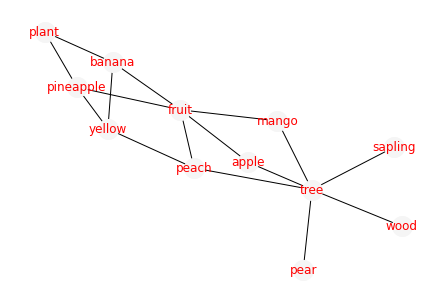

In [50]:
H = G.subgraph(["apple","tree","fruit","wood","yellow","pineapple","mango","banana","plant","pear","sapling","peach"])
nx.draw_spring(H,with_labels=True,node_size=400,font_size=12,node_color="whitesmoke", font_color="red")

In [31]:
print(G["abundance"])

{'lot': {}, 'wealth': {}, 'amplitude': {}, 'avalanche': {}, 'eldorado': {}, 'plenitude': {}, 'quantity': {}}


In [32]:
print(nx.density(G)) # density of the graph

0.0002629727546348967


#### Finding the most influential nodes amoung the graph using centrality measures. 

Let's find the most central nodes in the graph. Every graph has a few central points, that is the nodes which are the most connected to other nodes. These nodes are the most influential points in the graph. So we can say that these nodes, or in this case nouns are the most important nouns in the english dictionary.

<b>What is degree centrality?</b>

We are going to use degree centrality as the centrality measure to find our how much a node is connected to other nodes. 

> Degree centrality is one of the easiest to calculate. The degree centrality of a node is simply its degree—the number of edges it has. The higher the degree, the more central the node is. This can be an effective measure, since many nodes with high degrees also have high centrality by other measures- _Jennifer Golbeck, in Analyzing the Social Web, 2013_

In [33]:
def find_central_node(G):
    return nx.degree_centrality(G)

x=find_central_node(G) #fining the most influential node using the required measure
x=sorted(x.items(), key=lambda item: item[-1])[::-1] #sort

We find that most influential node in our nounweb is 'person'

In [34]:
print(x[0][0])#most influential node.

person


Let's write the words depending upon the influence order into a seprate file

In [35]:
# Writing the influential nodes to a csv file.
Influence_order=open("mostinfluential.csv","w")
for i in x:
    Influence_order.write(str(i[0]))
    Influence_order.write(",")
    Influence_order.write(str(i[1]))
    Influence_order.write("\n")
Influence_order.close()

In [36]:
#Print the first 10 most influential nodes with degree centrality.
print(x[0:10])

[('person', 0.07318133813754116), ('thing', 0.026464558613406224), ('being', 0.024849350810710068), ('plant', 0.018699136485059328), ('part', 0.01708392868236317), ('body', 0.013853513076970863), ('member', 0.009691246816176927), ('piece', 0.009629123439150152), ('device', 0.009504876685096602), ('place', 0.009132136422935951)]


#### Path from one word to another

Here we use a simple formula to find the distance of a path from one node to other.


$d=\sum_{}\frac{C_{\max}}{C_i}$


Where $d$ is the distance, $C_{\max}$ is the maximum centrality of the graph ( here 'person'). $C_i$ is the degree centrality over all the nodes in the path.


This is a very rough measure to find a quantitive score of distance between two nodes.

We can use this to find how similar or dissimilar two nouns are.

In [37]:
Centrality=nx.degree_centrality(G)
def calculate_dist(paths):
    """
    It calculates the sum of the degrees of all the nodes in the path.
    A very rough measure. 
    
    :param paths: a list of nodes that are in the path
    :return: The sum of the number of neighbors of each node in the path.
    """
    sum=0
    for i in list(paths):
        sum=sum+Centrality['person']/Centrality[i]
    return sum

We find the shortest path between two nodes using the 'A*' algorithm. The A* algorithm was selected due to it's low time complexity. In simple words, other algotithms were taking a long time to compute.

A* algorithm works on the principle of maximizing the sum of two parameters. One being distance between starting node and current node and other being distance between the destination node and current node.

In [38]:
def compare(noun1,noun2): # function to compare two nouns in math between two nouns and distance of the path.
    '''
    prints out the path  between the two nodes, neighbors
    of the nodes and distance between the nodes.
    :param noun1, noun2 two nouns
    :return: none
    
    '''
    # Finding the path between the two nodes using astar algorithm.
    paths = nx.astar_path(G,source=noun1,target=noun2) 
    for i in list(paths):
        print(i,end="->")
    print(calculate_dist(paths))
    

compare("mango", "tomato")
compare("tree","oak")


mango->fruit->tomato->642.9916666666668
tree->crab->food->growth->gall->oak->1691.595152423788


Let's calculate path from one noun to the other.

By finding the parth length we can check if two nouns are similar or dissimilar. Example the nouns "milk" and cheese" are similar when compared to the nouns "milk" and "car", which must be far apart.

In [39]:
try:
    compare("milk","cheese")
    compare("milk","car")
except nx.NodeNotFound:
    print("Sorry, the node is not prsent in th graph")

milk->cheese->91.15476190476191
milk->casein->main->trunk->car->570.4885714285714


#### Community detection

We now run a few community detection algorithms on our graph for creating 'groups' of nouns.


> When analyzing different networks, it may be important to discover communities inside them. Community detection techniques are useful for social media algorithms to discover people with common interests and keep them tightly connected. Community detection can be used in machine learning to detect groups with similar properties and extract groups for various reasons. For example, this technique can be used to discover manipulative groups inside a social network or a stock market. <i>Community Detection Algorithms, Towards Data Science</i>


In this case the community detection models are used to group words together.


Example words 'ethnology,cytology,bacteriology' are grouped together while words 'piranha, catfish, fish' are in another group.

In [ ]:
import networkx.algorithms.community as nx_comm


Louvin Community detection


Lovian community detection is based on maximizing modularity.

In [ ]:
com = nx_comm.louvain_communities(G, threshold=10000,resolution=100,seed=21)
for i in range(0,10):
    print(i+1, end=")  ")
    for j in com[i]:
        print(j, end=",")
    print()


1)  feeding,treecreeper,tsetse,fungus,aardvark,scavenger,parasite,
2)  abattoir,
3)  archbishopric,episcopate,office,incumbency,curacy,magistracy,stationery,precursor,bishopric,papacy,electorate,abbacy,
4)  abbé,shaman,celebrant,druid,curé,priesthood,stole,priest,
5)  pope,warhead,pate,corgi,head,gurnard,noddle,
6)  abbot,abbess,cenobite,abbey,community,ecosystem,coenobite,sisterhood,
7)  abdomen,thorax,peritoneum,pubes,
8)  insect,caddis-fly,cicada,midge,flea,silverfish,creepy-crawly,cockroach,thrips,aphid,cuckoo-spit,
9)  distortion,aberration,
10)  sickle-cell,kirby-grip,sanserif,loofah,type,shortcrust,ecstasy,pecan,tannoy,


Greedy Modularity Community Detection


This model also maximizes modularity in a greedy way

In [ ]:
com = nx_comm.greedy_modularity_communities(G,resolution=150)
for i in range(0,10):
    print(i+1, end=")  ")
    for j in com[i]:
        print(j, end=",")
    print()


1)  monkshood,monocotyledon,lichen,jojoba,phlox,lobelia,chive,polyanthus,alfalfa,cryptogam,canna,bougainvillaea,hollyhock,sunflower,arum,calceolaria,cornflower,house-plant,lupin,bryony,anemone,henbane,ice-plant,harebell,liverwort,snapdragon,borage,comfrey,hyssop,plant,cumin,burdock,yucca,stephanotis,flowerpot,fenugreek,aster,dicotyledon,eyebright,coriander,ranunculus,love-lies-bleeding,cow-parsley,moss,petunia,alkaloid,mignonette,spikenard,anise,amaryllis,gloxinia,fly-trap,catmint,arrowroot,willow-herb,endive,angelica,antirrhinum,larkspur,woodruff,fern,coleus,squill,liana,hyacinth,celandine,rock-plant,
2)  yttrium,technetium,radon,cadmium,rhenium,chromium,protactinium,rubidium,cobalt,argon,francium,metalloid,lawrencium,krypton,niobium,antimony,nobelium,element,cesium,fluorine,fermium,californium,potassium,gallium,rutherfordium,sodium,curium,plutonium,einsteinium,boron,germanium,selenium,americium,mendelevium,bismuth,tellurium,hahnium,lithium,neptunium,scandium,hafnium,radium,strontium,

Changing parameters

In [ ]:
com = nx_comm.greedy_modularity_communities(G,resolution=1000)
for i in range(0,10):
    print(i+1, end=")  ")
    for j in com[i]:
        print(j, end=",")
    print()


1)  diazepam,methadone,valium,junkie,amphetamine,aconite,antihistamine,drug,tranquillizer,veronal,ephedrine,vermicide,tranquilizer,hallucinogen,marijuana,heroin,
2)  flummery,malarkey,nonsense,tommy-rot,bosh,kibosh,tosh,flapdoodle,balderdash,boloney,codswallop,poppycock,bollocks,
3)  ennui,lack,indiscipline,disunion,disharmony,scarcity,disrespect,ingratitude,inaction,cowardice,apathy,levity,
4)  hosier,fishmonger,dealer,stockist,mercer,bookseller,fruiterer,tobacconist,seedsman,stationer,chandler,draper,
5)  laryngitis,nephritis,gastritis,pleurisy,pneumonia,conjunctivitis,inflammation,gingivitis,dysentery,appendicitis,sinusitis,tonsillitis,
6)  aurochs,lair,wildlife,devilment,cuckoo-pint,cranesbill,bison,wild,oregano,wart-hog,origan,dog-rose,
7)  inhabitant,earthling,londoner,aborigine,laplander,islander,townsman,briton,easterner,yankee,gaul,parishioner,
8)  dill,balm,rosemary,marjoram,sorrel,lovage,herb,basil,chervil,tarragon,fennel,
9)  humility,misanthropy,torpor,precondition,conditi

K Clique community Detection Algorithm

In [ ]:
com = nx_comm.k_clique_communities(G,4)  
counter=0
for i in com:
    if (counter>=10):
        break
    counter=counter+1
    print(counter,end=')')
    
    for j in i:
        print(j, end=",")
    print()


1)science,knowledge,theory,subject,
2)neighborhood,neighbourhood,vicinity,district,
3)organization,establishment,institution,being,
4)extent,space,area,territory,
5)hair,lock,tress,head,
6)radio,tuner,receiver,television,
7)corridor,country,territory,state,
8)girlfriend,sister,female,filly,girl,daughter,miss,lady,woman,
9)theatre,building,theater,area,hall,
10)item,thing,event,fact,


#### Conclusion.
Thus we have completed a lexographical analysis of the distribution of the words in the corpus of the corpus Oxford english dictionary. We have formed a network of nouns extracted from the dictionary. From this graph we have found out the most influential word is "person". We also ran a few community detection models on the network. We used the A* path finding algorithm to find the paths between two nouns and calculated the path length.

From a general point of view the results obtained from the community detection models do not form very good synsets. The results are somewhat satisfactory. This is a result of the fact that the lexographical analysis is limited to the corpus and the methodology has it's limitations. In order to improve the data, we can extend the dataset to include data from various sources using methods like webscrapping. This can be used to further increase the density of the graph and obtain better results.